## Load Dataset

In [18]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Data Cleaning

In [20]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
df = df.dropna(how='any')
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [22]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender = df.Gender.map({'Male':1,'Female':0})
df.Married = df.Married.map({'Yes':1,'No':0})
df.Dependents = df.Dependents.map({'3+':3, '2':2, '1':1, '0':0})
df.Education = df.Education.map({'Graduate':1, 'Not Graduate':0})
df.Self_Employed = df.Self_Employed.map({'Yes':1, 'No':0})
df.Property_Area = df.Property_Area.map({"Urban":1, 'Semiurban':0.5, 'Rural':0})
df.Loan_Status = df.Loan_Status.map({'Y':1, 'N':0})
df.Loan_Amount_Term = df.Loan_Amount_Term / 300
df.LoanAmount = df.LoanAmount /100
df.ApplicantIncome = df.ApplicantIncome / 10000
df.CoapplicantIncome = df.CoapplicantIncome /1000 # 数据预处理，简单约化一下
df = df.astype(dtype='float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null float64
Married              480 non-null float64
Dependents           480 non-null float64
Education            480 non-null float64
Self_Employed        480 non-null float64
ApplicantIncome      480 non-null float64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null float64
Loan_Status          480 non-null float64
dtypes: float64(12)
memory usage: 48.8 KB


## Data process

In [23]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
df_p = df[df["Loan_Status"] > 0.5]  # 分离正反例
df_n = df[df["Loan_Status"] < 0.5]
num_p_test = round(len(df_p)*0.9)
num_n_test = round(len(df_n)*0.9)
df_p.head()
df_p = df_p.sample(frac=1)     # 打乱顺序
df_p.head()
df_n = df_n.sample(frac=1)
X_train = pd.concat([df_p[:num_p_test],df_n[:num_n_test]])
X_test = pd.concat([df_p[num_p_test:],df_n[num_n_test:]])
y_train = X_train["Loan_Status"]
y_test = X_test["Loan_Status"]
X_train.drop(["Loan_Status"], axis=1, inplace=True)
X_test.drop(["Loan_Status"], axis=1, inplace=True)
#X_test.info()
#X_train.info()
#df_p.info()
#df_n.info()
# y_test.size

In [24]:
# check
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 501 to 192
Data columns (total 11 columns):
Gender               432 non-null float64
Married              432 non-null float64
Dependents           432 non-null float64
Education            432 non-null float64
Self_Employed        432 non-null float64
ApplicantIncome      432 non-null float64
CoapplicantIncome    432 non-null float64
LoanAmount           432 non-null float64
Loan_Amount_Term     432 non-null float64
Credit_History       432 non-null float64
Property_Area        432 non-null float64
dtypes: float64(11)
memory usage: 40.5 KB


## Train

In [25]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training
learning_model = LogisticRegression("l2")
learning_model.fit(X_train, y_train, draw_losscurve=True)

break2
Training over


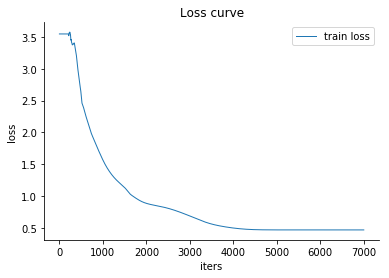

In [29]:
# plot Loss curve
tmp_loss = learning_model.losscurve[1,2:]
tmp_iters = learning_model.losscurve[0,2:]

plt.figure()
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('iters')
plt.ylabel('loss')

plt.plot(tmp_iters, tmp_loss, linewidth=1, linestyle="solid", label="train loss")
plt.legend()
plt.title('Loss curve')
plt.show()

## Test

In [27]:
from Logistic import LogisticRegression

model1 = LogisticRegression("l2", fit_intercept=True, la=1.0)   #standard
model2 = LogisticRegression("l2", fit_intercept=True, la=0.0)   #禁用正则化
model3 = LogisticRegression("l2", fit_intercept=False, la=1.0)  #考虑截距
model4 = LogisticRegression("l2", fit_intercept=True, la=1.0)   #比较不同lr的影响
model5 = LogisticRegression("l2", fit_intercept=True, la=1.0)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train, lr = 0.01)
model5.fit(X_train, y_train, lr = 0.1)

accu_train1 = model1.predict(X_train, y_train)[0,0]
accu_test1 = model1.predict(X_test, y_test)[0,0]
accu_train2 = model2.predict(X_train, y_train)[0,0]
accu_test2 = model2.predict(X_test, y_test)[0,0]
accu_train3 = model3.predict(X_train, y_train)[0,0]
accu_test3 = model3.predict(X_test, y_test)[0,0]
accu_train4 = model4.predict(X_train, y_train)[0,0]
accu_test4 = model4.predict(X_test, y_test)[0,0]
accu_train5 = model5.predict(X_train, y_train)[0,0]
accu_test5 = model5.predict(X_test, y_test)[0,0]

break2
Training over
break2
Training over
break2
Training over
break2
Training over
break2
Training over


In [30]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
print("l2正则化")
print("启用：train accuracy:",'%.4f'%accu_train1,";test accuracy:",'%.4f'%accu_test1)
print("禁用：train accuracy:",'%.4f'%accu_train2,";test accuracy:",'%.4f'%accu_test2)

print("\n截距")
print("启用：train accuracy:",'%.4f'%accu_train1,";test accuracy:",'%.4f'%accu_test1)
print("禁用：train accuracy:",'%.4f'%accu_train3,";test accuracy:",'%.4f'%accu_test3)

print("\n学习率")
print("lr=0.001：train accuracy:",'%.4f'%accu_train1,";test accuracy:",'%.4f'%accu_test1)
print("lr=0.01：train accuracy:",'%.4f'%accu_train4,";test accuracy:",'%.4f'%accu_test4)
print("lr=0.1：train accuracy:",'%.4f'%accu_train5,";test accuracy:",'%.4f'%accu_test5)

l2正则化
启用：train accuracy: 0.8125 ;test accuracy: 0.7917
禁用：train accuracy: 0.8125 ;test accuracy: 0.7917

截距
启用：train accuracy: 0.8125 ;test accuracy: 0.7917
禁用：train accuracy: 0.8125 ;test accuracy: 0.7917

学习率
lr=0.001：train accuracy: 0.8125 ;test accuracy: 0.7917
lr=0.01：train accuracy: 0.8102 ;test accuracy: 0.7917
lr=0.1：train accuracy: 0.6921 ;test accuracy: 0.6875
